# Autour du petit théorème de Fermat

<img src="Pierre_de_Fermat.jpg" width="15%" alt="Pierre de Fermat"/>

<center>
       MIAC Team <br/>
       Faculté Sciences et Technologies<br/>
       Université de Lille<br/>
       Mars 2019
</center>

Sources iconographiques [Wikipedia](https://fr.wikipedia.org/wiki/Enigma_%28machine%29) et Univ. Lille.

[<img src="cc-by-nc-sa.png" align="right" />](https://creativecommons.org/licenses/by-nc-sa/2.0/fr/)

In [1]:
import pylab
from math import log
from random import randrange
from arithmetique import *

## (petit) Théorème de Fermat

### Énoncé

**Théorème  (Fermat 1640) :**
Soit $p$ un nombre premier. Pour tout entier $a\in\mathbb{Z}$, $p$ divise $a^p - a$. Autrement dit,
$$ a^p \equiv a \pmod{p}.$$

**Corollaire :** Soit $p$ un nombre premier. Pour tout entier $a\in\mathbb{Z}$, si $a$ est premier avec $p$ alors $p$ divise $a^{p-1}-1$. Autrement dit,

$$\mbox{pgcd}(a, p)=1 \Longrightarrow a^{p-1}\equiv 1\pmod{p}.$$

Le corollaire se déduit du théorème en utilisant le lemme de Gauss.

### Preuve du théorème

La preuve du théorème s'appuie sur le lemme suivant :

** Lemme : ** Soit $p$ un nombre premier. Alors pour tout entier $k$ compris entre 1 et $p-1$, $p$ divise le coefficient binomial $\binom{p}{k}$. Autrement dit,

$$\forall k \in[1, p-1],\quad \binom{p}{k}\equiv 0\pmod{p}.$$

** Preuve du lemme :** Comme
$$ \binom{p}{k} = \frac{p!}{(p-k)!k!},$$
on a
$$ p! = k!(p-k)!\binom{p}{k},$$
et donc
$$ p |k!(p-k)!\binom{p}{k}.$$

Et puisque $1\leq k\leq p-1$ et $p$ est premier, alors $p$ ne divise ni $k!$, ni $(p-k)!$. On en déduit d'après le lemme de Gauss que
$$ p|\binom{p}{k}.$$


**Preuve du théorème :** On démontre par récurrence sur $a$ que la propriété $\mathcal{P}(a) = p|(a^p - a)$ est vraie pour tout entier $a\geq 0$.

* Cas de base : $\mathcal{P}(0)$ est vraie puisque $p|0$.
* Hérédité : hypothèse de récurrence : supposons la propriété $\mathcal{P}(a)$ vraie pour un entier $a\geq 0$.
  La formule du binôme de Newton donne
  $$ (a+1)^p = \sum_{k=0}^{p}\binom{p}{k}a^{k} = 1 + \binom{p}{1}a + \binom{p}{2}a^2 + \ldots + \binom{p}{p-1}a^{p-1} + a^p.$$  
  
  Dans cette somme tous les termes en $a^k$ avec $1\leq k \leq p-1$ sont divisibles par $p$ d'après le lemme précédent. Par conséquent,
  
  $$ (a+1)^p \equiv a^p + 1 \pmod{p},$$
  et d'après l'hypothèse de récurrence
  $$ (a+1)^p \equiv a + 1 \pmod{p}.$$
  
  On en déduit donc que $p$ divise $(a+1)^p - (a+1)$ et donc que la propriété $\mathcal{P}(a+1)$ est vraie.
  
Le théorème est ainsi démontré pour tout $a\in\mathbb{N}$. Pour les entier négatifs, 

* si $p=2$ $a^p$ a la même parité que $a$ et $a^p -a$ est donc toujours un nombre pair, donc divisible par 2 ;
* si $p$ est un nombre premier autre que 2, donc impair, il suffit de se ramener au cas positif en remarquant que   $(-a)^p - (-a) = -(a^p -a)$.

### Et la réciproque ?

Le théorème de Fermat est une implication :

$$ p\mbox{ premier }\Longrightarrow \forall a\in\mathbb{Z}\quad a^p\equiv a\pmod{p}.$$

La réciproque est-elle vraie ?

Remarquons tout d'abord que pour tout entier naturel $n$ non nul, la proposition $\forall a\in\mathbb{Z}\quad a^n\equiv a\pmod{n}$ est équivalente à la proposition $\forall a\in[0,n-1]\quad a^n\equiv a\pmod{n}$.

Il est en effet évident que la première implique la seconde. Que la seconde implique la première découle que tout entier $a$ est congru modulo à un entier $a'$ dans l'intervalle $[0, n-1]$, et qu'alors on a modulo $n$ :
$$ a^n \equiv a'^n \equiv a' \equiv a.$$

Cherchons s'il existe un entier inférieur ou égal à 1000 qui contredit la réciproque, à savoir s'il existe un entier non premier $n$ tel que $\forall a\in\mathbb{Z}\quad a^n\equiv a\pmod{n}$. 

Compte tenu de la remarque précédente, il suffit de chercher un entier $n$ non premier tel que $\forall a\in[0,n-1]\quad a^n\equiv a\pmod{n}$.

In [2]:
n_max = 1000
n = 2
while n <= n_max and (est_premier2(n) or 
                      any(a**n % n != a for a in range(n))):
    n += 1
n

561

Le nombre trouvé étant inférieur ou égal à $n$, on a trouvé un entier qui contredit la réciproque. 

**Conclusion :** La réciproque du théorème de Fermat est fausse.

## Applications au calcul

Cf polycopié

**Exercice :** Calculez « à la main » $31^{17334}\pmod{37}$. 

## Application au test de (non) primalité

### $F_5$ est il un nombre premier ?

Les *nombres de Fermat* sont les nombres de la forme $2^{2^n}+1$. On les note $F_n$. Voici les premiers nombres de Fermat :

| $n$ | $F_n$ |
|-----|-------|
|  0  |   3   |
|  1  |   5   |
|  2  |  17   |
|  3  | 257   |
|  4  |65537  |

Ces nombres sont tous premiers et Fermat le savait. Dans une lettre adressée à Mersenne en 1640, Fermat conjecturait que tous ces nombres étaient premiers, mais déclarait ne pas avoir réussi à déterminer si $F_5= 4294967297$ l'était (source : *The Art of Programming, vol 2*, §4.5.4, D.E. Knuth).

Saurez-vous lui répondre ?

Voici une fonction pour calculer les nombres $F_n$,

In [3]:
nbre_fermat = lambda n: 2**(2**n) + 1

et la liste de ces nombres jusqu'à $n=10$ :

In [4]:
NBFermat = [nbre_fermat(n) for n in range(11)]
NBFermat

[3,
 5,
 17,
 257,
 65537,
 4294967297,
 18446744073709551617,
 340282366920938463463374607431768211457,
 115792089237316195423570985008687907853269984665640564039457584007913129639937,
 13407807929942597099574024998205846127479365820592393377723561443721764030073546976801874298166903427690031858186486050853753882811946569946433649006084097,
 179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137217]

La croissance doublement exponentielle de cette suite de nombres fait que pour $n=10$ on a un nombre dont l'écriture en base 10 contient plusieurs centaines de chiffres. 

L'écriture binaire des nombres de Fermat est très simple : $F_n$ s'écrit avec deux bits à 1 séparés de $n$ bits nuls. Ainsi, la taille de l'écriture binaire de $F_n$ est égale à $n+2$.

En base 10, le nombre de chiffres nécessaires pour écrire le nombre $F_n$ est $\lfloor\log_{10}(F_n)\rfloor + 1$.
Ce qui donne approximativement $\approx 2^n\log_{10}(2)$.

Pour $n=10$ on obtient

In [5]:
2**10*log(2, 10)

308.2547155599167

$F_{10}$ est donc un nombre de 309 chiffres décimaux.

Mais revenons à la primalité éventuelle de $F_5$.

In [6]:
F5 = nbre_fermat(5)

Calculons $2^{F_5 - 1}\pmod{F_5}$.

**À la main, comme Fermat aurait pu le faire :** Il s'agit donc de calculer $2^{2^{2^5}}\pmod{F_5}$. Cela revient (a priori) à répéter 32 fois de suite une élévation au carré et une réduction modulo $F_5$ (i.e. une division euclidienne).

\begin{align}
   2^2 &\equiv 4 \pmod{F_5} \equiv 4\\
   4^2 &\equiv 16\pmod{F_5} \equiv 16\\
   16^2 &\equiv 256\pmod{F_5} \equiv 256\\
   256^2 &\equiv 65536\pmod{F_5}\equiv 65536\\
   65536^2 &\equiv 4294967296\pmod{F_5} \equiv 4294967296\\
\end{align}
Arrêtons-nous après ces cinq premières étapes (dont aucune ne nécessite de division) et remarquons que le dernier nombre obtenu est $F_5 - 1\equiv -1 \pmod{F_5}$. Cela signifie que la sixième étape va donner 1, et toutes les suivantes resteront sur 1. Par conséquent

$$ 2^{F_5-1} \equiv 1\pmod{F_5}.$$

**Avec Python :**

In [7]:
expo_mod_rapide(2, F5-1, F5)

1

On trouve 1 comme le prévoit le théorème de Fermat si $F_5$ est premier.

Calculons $3^{F_5-1}\pmod{F_5}$.

In [8]:
expo_mod_rapide(3, F5 - 1, F5)

3029026160

On ne trouve pas 1 ! Or si $F_5$ était premier on aurait dû avoir 1.

**Conclusion :** $F_5$ n'est pas premier.

**Remarque :** nous avons pu prouver que $F_5$ n'est pas un nombre premier sans trouver de diviseur propre.

Voici une factorisation en nombres premiers de $F_5$ :

In [9]:
factorise(F5)

[(641, 1), (6700417, 1)]

### Et les nombres de Fermat suivant ?

#### Commençons par $F_6$.

In [10]:
F6 = nbre_fermat(6)

In [11]:
expo_mod_rapide(3, F6-1, F6)

8752249535465629170

$F_6$ n'est pas premier.

Mais il semble bien plus difficile de calculer la décomposition en facteurs premiers de ce nombre : 

In [12]:
# après une huit minutes de calculs, toujours pas de résultat 
# factorise(F6)

Calculons le plus petit diviseur de $F_6$

In [13]:
p6 = plus_petit_diviseur(F6)
p6

274177

On sait que ce plus petit diviseur est un nombre premier.

In [14]:
q6 = F6 // p6
print(q6)
est_premier2(q6)

67280421310721


True

#### Le cas de $F_7$

In [15]:
F7 = nbre_fermat(7)

Calculons $3^{F_7-1}\pmod{F_7}$.

In [16]:
expo_mod_rapide(3, F7-1, F7)

47511664169441434718291075092691853899

$F_7$ n'est pas un nombre premier comme en témoigne le nombre $a=3$.

In [17]:
# Après une vingtaine de minutes de calculs pas de résultats
# plus_petit_diviseur(F7)

On voit sur cet exemple l'intérêt du théorème de Fermat pour prouver la non primalité de grands nombres entiers. 

### Témoin de non primalité

Supposons que nous souhaitions savoir si un entier $n$ est premier.

Si nous trouvons un entier $a$ tel que

1. $\mbox{pgcd}(a,n)=1$ ($a$ et $n$ sont premiers entre eux)
2. $a^{n-1}\not\equiv 1 \pmod{n}$,

alors, en vertu du corollaire du théorème de Fermat, nous pouvons en conclure que le nombre $n$ n'est pas un nombre premier.

On dit alors que le nombre $a$ est un *témoin de non primalité* de $n$.

**Exemples :**
3 est un témoin de non primalité de $F_5$.

**Remarques :** 

1. 0 et 1 ne sont témoin de non primalité d'aucun nombre.
2. Si $a$ est un témoin de non primalité de $n$, alors tout nombre $a'\equiv a\pmod{n}$ est aussi un témoin de non primalité. On en déduit que si un entier $n$ possède des témoins de non primalité, il en a au moins un dans l'intervalle $[2, n- 1]$. 

In [18]:
def est_temoin_non_primalite(a, n):
    '''
    :param a, n: (int)
    :return: (bool)
        - True si a est un témoin de non primalité de n
        - False sinon
    :CU: n > 1
    :Exemples:
    
    >>> n = 2**32 + 1
    >>> est_temoin_non_primalite(2, n)
    False
    >>> est_temoin_non_primalite(3, n)
    True
    '''
    return pgcd(a, n) == 1 and expo_mod_rapide(a, n-1, n) != 1

Un nombre premier ne peut pas avoir de témoin de non primalité. 

Par exemple 17 n'a aucun témoin de non primalité dans l'intervalle [2, 16] (et donc aucun en dehors de cet intervalle) :

In [19]:
p = 17
any(est_temoin_non_primalite(a, p) for a in range(2, p))

False

Considérons un nombre composé $n$ et cherchons ses témoins de non primalité dans l'intervalle $[2, n-1]$.

In [20]:
n = 10
temoins = [a for a in range(2, n) if est_temoin_non_primalite(a, n)]
temoins

[3, 7, 9]

Le nombre $n=${{n}} possède {{len(temoins)}} témoins dans l'intervalle [2, {{n-1}}].

In [21]:
def liste_temoins(n):
    return [a for a in range(2, n) if est_temoin_non_primalite(a, n)]

Calculons le nombre de témoins de non primalité pour les entiers de 3 à 100.

In [22]:
n_max = 100
listes_temoins = [liste_temoins(n) for n in range(3, n_max + 1)]
for n in range(3, n_max + 1):
    temoins = listes_temoins[n - 3]
    print('{:3d} : {:3d}  {:.2%}'.format(n, 
                                         len(temoins), 
                                         len(temoins)/(n - 2)))

  3 :   0  0.00%
  4 :   1  50.00%
  5 :   0  0.00%
  6 :   1  25.00%
  7 :   0  0.00%
  8 :   3  50.00%
  9 :   4  57.14%
 10 :   3  37.50%
 11 :   0  0.00%
 12 :   3  30.00%
 13 :   0  0.00%
 14 :   5  41.67%
 15 :   4  30.77%
 16 :   7  50.00%
 17 :   0  0.00%
 18 :   5  31.25%
 19 :   0  0.00%
 20 :   7  38.89%
 21 :   8  42.11%
 22 :   9  45.00%
 23 :   0  0.00%
 24 :   7  31.82%
 25 :  16  69.57%
 26 :  11  45.83%
 27 :  16  64.00%
 28 :   9  34.62%
 29 :   0  0.00%
 30 :   7  25.00%
 31 :   0  0.00%
 32 :  15  50.00%
 33 :  16  51.61%
 34 :  15  46.88%
 35 :  20  60.61%
 36 :  11  32.35%
 37 :   0  0.00%
 38 :  17  47.22%
 39 :  20  54.05%
 40 :  15  39.47%
 41 :   0  0.00%
 42 :  11  27.50%
 43 :   0  0.00%
 44 :  19  45.24%
 45 :  16  37.21%
 46 :  21  47.73%
 47 :   0  0.00%
 48 :  15  32.61%
 49 :  36  76.60%
 50 :  19  39.58%
 51 :  28  57.14%
 52 :  21  42.00%
 53 :   0  0.00%
 54 :  17  32.69%
 55 :  36  67.92%
 56 :  23  42.59%
 57 :  32  58.18%
 58 :  27  48.21%
 59 :  

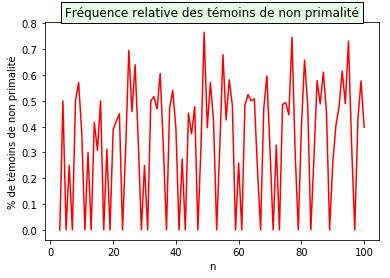

In [23]:
pylab.plot(list(range(3, 101)), [len(listes_temoins[n-3])/(n-2) for n in range(3, 101)], color='r')
pylab.xlabel('n')
pylab.ylabel('% de témoins de non primalité')
pylab.title('Fréquence relative des témoins de non primalité', bbox=dict(facecolor=(0.9, 1, 0.9)))
pylab.show()

Seuls les nombres premiers semblent n'avoir aucun témoin de non primalité. Est-ce bien le cas ?

In [24]:
n = 100
while est_premier2(n) or len(liste_temoins(n)) != 0:
    n += 1
print(n)
print(factorise(n))
print(liste_temoins(n))

561
[(3, 1), (11, 1), (17, 1)]
[]


561 est le plus petit nombre non premier qui ne possède aucun témoin de non primalité.

**Exercice** Trouvez l'entier inférieur à 10000 dont le nombre de témoins de non primalité est relativement le plus grand, i.e. telle que la fréquence de ce nombre de témoins $\frac{\mbox{nbre temoins}}{n-2}$ est la plus grande. Même question avec la fréquence la plus petite mais non nulle.

In [25]:
n_max = n_min = 4
max_temoins = min_temoins = len(liste_temoins(4))/(4-2)
for n in range(5, 10001):
    freq_temoins = len(liste_temoins(n))/(n-2)
    if 0 < freq_temoins < min_temoins:
        n_min = n
        min_temoins = freq_temoins
    elif max_temoins < freq_temoins:
        n_max = n
        max_temoins = freq_temoins
((n_min, min_temoins), (n_max, max_temoins))

((2310, 0.20753899480069324), (9409, 0.979695971085362))

### Nombres de Carmichael

Un *nombre de Carmichael* est un nombre entier $n$ qui n'est pas premier et pour lequel, dans l'intervalle $[1, n-1]$,  il n'existe aucun témoin de non primalité autre que les nombres non premiers avec $n$. Autrement dit,  un entier composé $n$ est un nombre de Carmichael si pour tout entier $a\in[1, n-1]$ on a

$$ \mbox{pgcd}(a, n) = 1 \Longrightarrow a^{n-1}\equiv 1 \pmod{n}.$$

**Théorème de Korselt (1899)** Un entier positif composé $n$ est un nombre de Carmichael si et seulement si aucun carré de nombre premier ne divise $n$ (on dit que $n$ est sans facteur carré) et pour chaque diviseur premier $p$ de $n$, le nombre $p - 1$ divise $n - 1$.

On en déduit que la connaissance de la décomposition en facteurs premiers d'un entier permet de savoir si ce nombre est un nombre de Carmichael.

Soit $n$ un entier dont la décomposition est

$$ n = \prod_{i=1}^{r}p_i^{\alpha_i},$$
les $p_i$ étant des nombres premiers distincts et les $\alpha_i$ des entiers positifs non nuls, alors $n$ est un nombre de Carmichael si et seulement si les trois conditions suivantes sont réunies :

1. pour tout $i=1, \ldots, r$, on a $\alpha_i = 1$, i.e. $n$ n'est divisible par aucun carré de nombres premiers ;
2. $r\geq 2$, i.e. $n$ n'est pas un nombre premier ;
3. pour tout $i=1, \ldots, r$, on a $n-1\equiv 0 \pmod{p_i - 1}$. 

In [26]:
def est_carmichael(n):
    '''
    :param n: (int)
    :return: (bool)
       - True si n est un nombre de Carmichael
       - False sinon
    :CU: n > 0
    :Exemples:
    
    >>> any(est_carmichael(k) for k in range(1, 561))
    False
    >>> est_carmichael(561)
    True
    '''
    fact = factorise(n)
    r = len(fact)
    return (r > 1 and
            all(fact[i][1] == 1 for i in range(r)) and
            all((n - 1) % (fact[i][0] - 1) == 0 for i in range(r)))

Le plus petit nombre de Carmichael est 561.

In [27]:
any(est_carmichael(k) for k in range(1, 561))

False

In [28]:
est_carmichael(561)

True

Il n'y a que sept nombres de Carmichael inférieurs ou égaux à 10000.

In [29]:
[k for k in range(2, 10000) if est_carmichael(k)]

[561, 1105, 1729, 2465, 2821, 6601, 8911]

**Remarque :** le prédicat réalisé pour tester si un nombre est un nombre de Carmichael s'appuie sur la décomposition en facteurs premiers de ce nombre. Or à ce jour on ne connaît aucun algorithme efficace de factorisation des nombres entiers.

**Exercice :** La décomposition en facteurs premiers des nombres de Carmichael comprend au moins trois facteurs premiers. Trouvez tous les nombres de Carmichael produits de trois nombres premiers inférieurs à 1000. Combien y en a-t-il ?

In [30]:
lp = eratosthene(1000)
nlp = len(lp)
liste_carmichael_3_facteurs_premiers =[lp[i]*lp[j]*lp[k] for i in range(nlp)
                   for j in range(i+1, nlp) 
                   for k in range(j+1, nlp)
                   if est_carmichael(lp[i]*lp[j]*lp[k])]
len(liste_carmichael_3_facteurs_premiers)

66

In [31]:
liste_carmichael_3_facteurs_premiers

[561,
 1105,
 2465,
 10585,
 1729,
 2821,
 8911,
 6601,
 15841,
 52633,
 29341,
 46657,
 115921,
 314821,
 530881,
 162401,
 334153,
 1024651,
 1615681,
 5444489,
 399001,
 512461,
 1193221,
 1857241,
 5049001,
 294409,
 488881,
 1461241,
 252601,
 410041,
 1909001,
 5148001,
 7519441,
 1152271,
 3057601,
 6868261,
 11972017,
 15829633,
 2508013,
 4335241,
 6189121,
 9439201,
 10267951,
 10024561,
 14676481,
 31405501,
 14469841,
 19384289,
 50201089,
 3828001,
 6733693,
 37964809,
 17098369,
 79624621,
 17236801,
 68154001,
 64377991,
 92625121,
 34657141,
 29111881,
 56052361,
 118901521,
 82929001,
 116682721,
 172947529,
 216821881]

[(331, 1), (661, 1), (991, 1)]

### Test de non primalité

On peut utiliser le théorème de Fermat pour prouver la non primalité de certains nombres. Il suffit pour cela de trouver un témoin de non primalité de ce nombre.

La fonction qui suit, est un prédicat qui cherche au hasard un témoin de non primalité d'un entier $n$ dans l'intervalle $[2, n-1]$ (on rappelle que si un nombre $n$ possède des témoins de non primalité, alors il en a dans cet intervalle). Bien entendu, en choisissant des nombres au hasard, on n'est pas certain d'avoir un témoin de non primalité. L'algorithme itère donc ces choix au hasard, jusqu'à trouver un témoin ou à atteindre un nombre maximal d'essais fixé (ici par défaut à 20).

In [33]:
def est_compose(n, nbre_essais=20):
    '''
    :param n: (int)
    ;param nbre_essais: (int) nbre maximal de tentatives de trouver un témoin de non primalité
    :return: (bool)
       - True si un témoin de non primalité a été trouvé
       - False sinon
    :CU: n > 2

    '''
    a = randrange(2, n)
    essai = 0
    while essai <= nbre_essais and not est_temoin_non_primalite(a, n):
        a = randrange(2, n)
        essai += 1
    return essai < nbre_essais

Lorsque le nombre passé en paramètre est un nombre premier, l'absence de témoins fait que le prédicat fournira toujours une réponse correcte : `False`. 

In [34]:
[est_compose(n) for n in eratosthene(100)[1:]]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

Mais lorsque un nombre est composé, il peut fournir des réponses fausses.

In [35]:
[est_compose(18, nbre_essais=1) for _ in range(20)]

[False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True]

Si on appelle le prédicat avec un nombre de tentatives égal à sa valeur par défaut (20)

In [36]:
[est_compose(18) for _ in range(20)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

Bien entendu, les nombres de Carmichael font que ce prédicat fournit toujours une réponse fausse.

In [37]:
est_compose(561)

False

In [38]:
[est_compose(nbre_fermat(n)) for n in (5, 6, 7, 8, 9, 10)]

[True, True, True, True, True, True]

Résumons les propriétés de notre prédicat :

1. Il est *probabiliste*, car il effectue des choix au hasard.
2. Il peut produire des réponses fausses selon les modalités suivantes :
     
   * si le nombre passé en paramètre est un nombre premier, le prédicat répond toujours correctement : `False` ;
   * si le nombre est composé, la réponse fournie par le prédicat peut être correcte (`True`) ou non (`False`).
      Hormis pour les nombres de Carmichael pour lesquels la réponse est toujours incorrecte, la probabilité d'avoir une réponse incorrecte décroît en tendant vers 0 avec le nombre d'essais.

Dans la pratique, si un appel à `est_compose` donne la réponse

1. `True`, alors cette réponse est correcte et on sait avec certitude que le nombre est composé, et n'est donc pas premier ;
2. `False`, alors cette réponse est peut-être erronée, la probabilité que ce soit le cas tendant vers 0 lorsque le nombre d'essais tend vers l'infini, sauf si le nombre est un nombre de Carmichael.


**Conclusion :** le petit théorème de Fermat permet de prouver la non primalité de beaucoup de nombres en recourant à des tirages au hasard. Malheureusement l'existence d'une infinité de nombres de Carmichael qui font échouer systématiquement les tests, ne permet pas de garantir que lorsqu'un nombre est déclaré non composé par ces tests, il le soit avec une probabilité aussi proche que 1 que l'on veut.

Heureusement, il existe d'autres tests probabilistes pour lesquels il n'existe pas de nombres les mettant systématiquement en défaut comme les nombres de Carmichael. 

**Exercice :** Existe-t-il un nombre de Fermat $F_n$, avec $8\leq n \leq 14$ qui soit premier ? 

In [39]:
[(n, est_compose(nbre_fermat(n))) for n in range(8, 15)]

[(8, True),
 (9, True),
 (10, True),
 (11, True),
 (12, True),
 (13, True),
 (14, True)]

Pour chacune des valeurs de $n\in[8, 14]$ le prédicat `est_compose` répond `True`. Comme on l'a vu, ces réponses sont correctes. Aucun de ces nombres de Fermat n'est premier.

**Exercice :** Utilisez le prédicat `est_compose` pour trouver un nombre (probablement) premier ayant 30 chiffres. 

In [40]:
taille = 30
n = 10
while est_compose(n):
    n = randrange(10**(taille - 1), 10**taille-2)
    if n % 2 == 0: n += 1
n

562256065206091012960446315379